# Stock Price Prediction Using Python & Machine Learning

## Los usos de este Programa en concurrencia de conexiones neuronales artificial 
   llamado: Long Short Term Memory(LSTM). Para predecir los precios de cierre en un Stock
   De una Corporocacion (Bitcoin) BTC Para este ejemplo
   usando los anteriores 30, 50  100 dias de los precios del Stock

# Importar de Librerias

In [4]:
import numpy as np
import pandas as pd
#import requests
#import xlsxwriter
import math
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
BTC = pd.read_csv('bitcoin_csv.csv')
BTC

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
0,2009-01-09,NaN,NaN,0,NaN,NaN,NaN,700.0,0.000000,14,1.000000e+00,NaN,NaN,NaN,3010,14
1,2009-01-10,NaN,NaN,0,NaN,NaN,NaN,3050.0,0.000000,61,1.000000e+00,NaN,NaN,NaN,13129,61
2,2009-01-11,NaN,NaN,0,NaN,NaN,NaN,4650.0,0.000000,93,1.000000e+00,NaN,NaN,NaN,20033,93
3,2009-01-12,NaN,NaN,7,NaN,NaN,NaN,4700.0,0.000000,102,1.000000e+00,5.0,NaN,0.000000,22031,94
4,2009-01-13,NaN,NaN,0,NaN,NaN,NaN,6150.0,0.000000,123,1.000000e+00,NaN,NaN,NaN,26527,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3600,2018-11-18,1.976557e+09,1.304067e+09,239680,9.664468e+10,5559.74,4.159680e+09,1537.5,18.037467,549212,6.653303e+12,301260.0,78.226098,0.000031,117375788,123
3601,2018-11-19,4.480410e+09,2.620049e+09,267845,9.771459e+10,5620.78,7.039560e+09,1575.0,39.969486,674503,6.653303e+12,361918.0,151.592437,0.000076,138689706,126
3602,2018-11-20,5.838062e+09,3.944652e+09,288318,8.456520e+10,4863.93,8.428290e+09,1650.0,69.367650,768696,6.653303e+12,423180.0,260.945272,0.000117,158893720,132
3603,2018-11-21,3.406311e+09,2.220358e+09,254837,7.764452e+10,4465.54,6.120120e+09,1312.5,49.950160,628177,6.653303e+12,367256.0,161.673715,0.000101,127422353,105


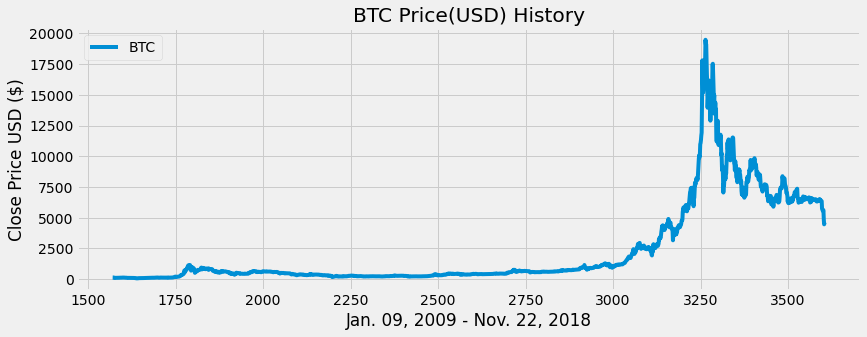

In [6]:
#Visualizar la Data
plt.figure(figsize=(12.5, 4.5))
plt.plot(BTC['price(USD)'], label = 'BTC')
plt.title('BTC Price(USD) History')
plt.xlabel('Jan. 09, 2009 - Nov. 22, 2018')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

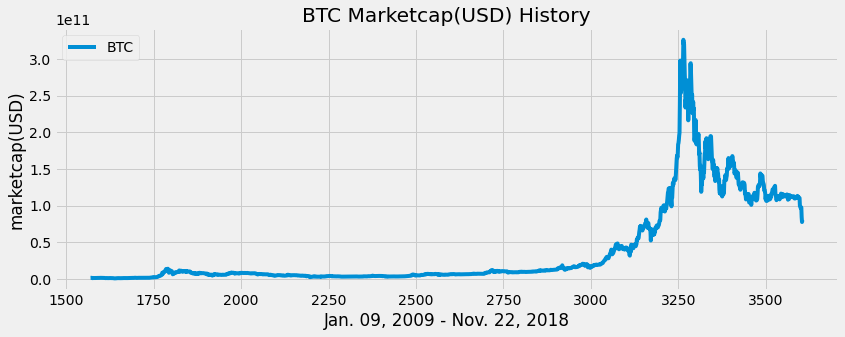

In [7]:
#Visualizar El Mercado de Capitalizacion 
plt.figure(figsize=(12.5, 4.5))
plt.plot(BTC['marketcap(USD)'], label = 'BTC')
plt.title('BTC Marketcap(USD) History')
plt.xlabel('Jan. 09, 2009 - Nov. 22, 2018')
plt.ylabel('marketcap(USD)')
plt.legend(loc='upper left')
plt.show()

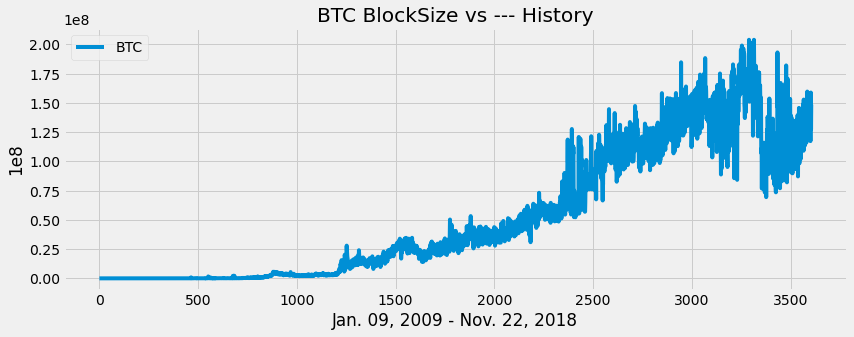

In [8]:
#blockSize
plt.figure(figsize=(12.5, 4.5))
plt.plot(BTC['blockSize'], label = 'BTC')
#plt.plot(BTC['averageDifficulty'], label = 'AVG')
plt.title('BTC BlockSize vs --- History')
plt.xlabel('Jan. 09, 2009 - Nov. 22, 2018')
plt.ylabel('1e8')
plt.legend(loc='upper left')
plt.show() 

In [9]:
#A 50 dias
SMA50 = pd.DataFrame()
SMA50 ['blockSize'] = BTC['blockSize'].rolling(window=50).mean()
SMA50

,blockSize
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3600,1.354382e+08
3601,1.361689e+08
3602,1.366383e+08
3603,1.364047e+08


In [10]:
#A 365 dias
SMA365 = pd.DataFrame()
SMA365 ['blockSize'] = BTC['blockSize'].rolling(window=365).mean()
SMA365

,blockSize
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3600,1.352954e+08
3601,1.352181e+08
3602,1.351650e+08
3603,1.350137e+08


In [11]:
#A 1000 dias

SMA10 = pd.DataFrame()
SMA10 ['blockSize'] = BTC['blockSize'].rolling(window=10).mean()
SMA10

,blockSize
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3600,137478334.7
3601,136930318.9
3602,140301929.4
3603,140282855.2


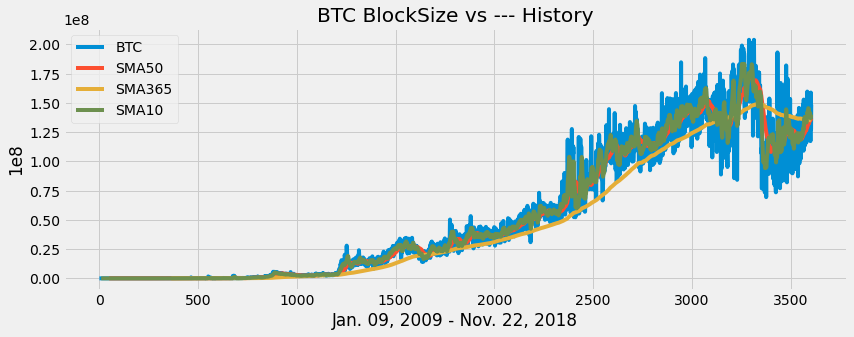

In [12]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(BTC['blockSize'], label = 'BTC')
plt.plot(SMA50['blockSize'], label = 'SMA50')
plt.plot(SMA365['blockSize'], label = 'SMA365')
plt.plot(SMA10['blockSize'], label = 'SMA10')
plt.title('BTC BlockSize vs --- History')
plt.xlabel('Jan. 09, 2009 - Nov. 22, 2018')
plt.ylabel('1e8')
plt.legend(loc='upper left')
plt.show() 

In [13]:
#Create a new data frame to store all the data
block_data = pd.DataFrame()
block_data['BTC'] = BTC['blockSize']
block_data['SMA50'] = SMA50['blockSize']
block_data['SMA365'] = SMA365['blockSize']
block_data['SMA10'] = SMA10['blockSize']
block_data

,BTC,SMA50,SMA365,SMA10
0,3010,NaN,NaN,NaN
1,13129,NaN,NaN,NaN
2,20033,NaN,NaN,NaN
3,22031,NaN,NaN,NaN
4,26527,NaN,NaN,NaN
...,...,...,...,...
3600,117375788,1.354382e+08,1.352954e+08,137478334.7
3601,138689706,1.361689e+08,1.352181e+08,136930318.9
3602,158893720,1.366383e+08,1.351650e+08,140301929.4
3603,127422353,1.364047e+08,1.350137e+08,140282855.2


In [14]:
#Create a function to signal when to bu and sell
def buy_sell(block_data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range(len(block_data)):
        if block_data['SMA10'][i]  > block_data['SMA50'][i]:
            if flag != 1:
                sigPriceBuy.append(block_data['BTC'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif block_data['SMA10'][i] < block_data['SMA50'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(block_data['BTC'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
    return (sigPriceBuy, sigPriceSell)

In [15]:
#Store the buy and sell data into a variable
buy_sell = buy_sell(block_data)
block_data['Buy_Signal_Price'] = buy_sell[0]
block_data['Sell_Signal_Price'] = buy_sell[1]

In [16]:
block_data

,BTC,SMA50,SMA365,SMA10,Buy_Signal_Price,Sell_Signal_Price
0,3010,NaN,NaN,NaN,NaN,NaN
1,13129,NaN,NaN,NaN,NaN,NaN
2,20033,NaN,NaN,NaN,NaN,NaN
3,22031,NaN,NaN,NaN,NaN,NaN
4,26527,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3600,117375788,1.354382e+08,1.352954e+08,137478334.7,NaN,NaN
3601,138689706,1.361689e+08,1.352181e+08,136930318.9,NaN,NaN
3602,158893720,1.366383e+08,1.351650e+08,140301929.4,NaN,NaN
3603,127422353,1.364047e+08,1.350137e+08,140282855.2,NaN,NaN


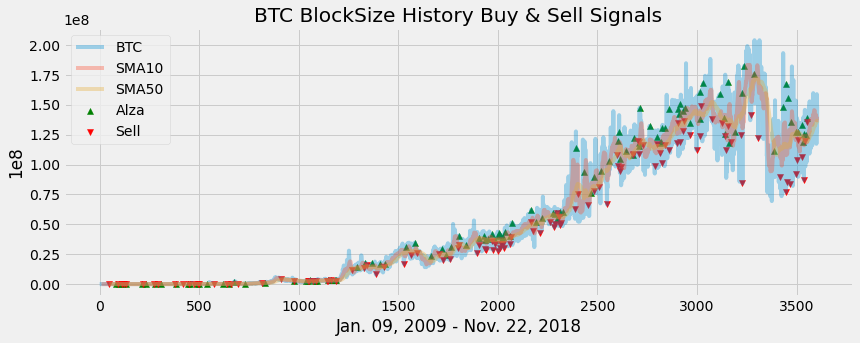

In [17]:
#Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.6, 4.6))
plt.plot(block_data['BTC'], label = 'BTC', alpha = 0.35)
plt.plot(block_data['SMA10'], label = 'SMA10', alpha = 0.35)
plt.plot(block_data['SMA50'], label = 'SMA50', alpha = 0.35)
#plt.plot(block_data['SMA365'], label = 'SMA365', alpha = 0.35)
plt.scatter(block_data.index, block_data['Buy_Signal_Price'], label = 'Alza', marker = '^', color = 'green')
plt.scatter(block_data.index, block_data['Sell_Signal_Price'],label = 'Sell', marker = 'v', color = 'red')
plt.title('BTC BlockSize History Buy & Sell Signals')
plt.xlabel('Jan. 09, 2009 - Nov. 22, 2018')
plt.ylabel('1e8')
plt.legend(loc='upper left')
plt.show() 

# Analisis de los Precios del Mercado (BTC)

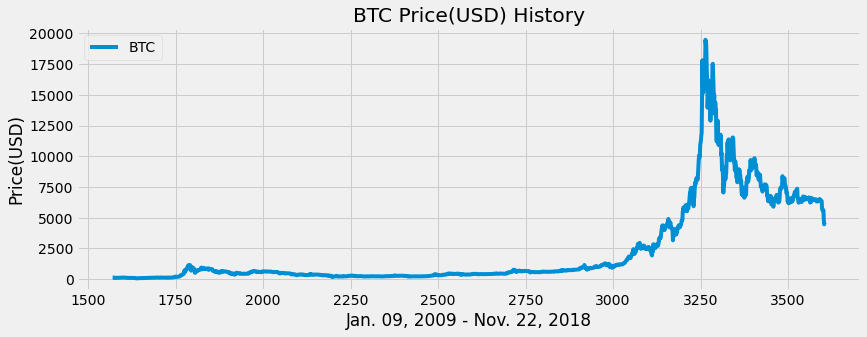

In [18]:
#Price(USD)

#Visualizar El Mercado de Capitalizacion 
plt.figure(figsize=(12.5, 4.5))
plt.plot(BTC['price(USD)'], label = 'BTC')
plt.title('BTC Price(USD) History')
plt.xlabel('Jan. 09, 2009 - Nov. 22, 2018')
plt.ylabel('Price(USD)')
plt.legend(loc='upper left')
plt.show()

In [19]:
PSMA10 = pd.DataFrame()
PSMA10 ['price(USD)'] = BTC['price(USD)'].rolling(window=10).mean()
PSMA10

,price(USD)
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3600,6089.834
3601,6007.652
3602,5855.432
3603,5660.623


In [20]:
#A 50 dias
PSMA50 = pd.DataFrame()
PSMA50 ['price(USD)'] = BTC['price(USD)'].rolling(window=50).mean()
PSMA50

,price(USD)
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3600,6401.1020
3601,6381.4234
3602,6346.3050
3603,6303.7510


In [21]:
#A 365 dias
PSMA365 = pd.DataFrame()
PSMA365 ['price(USD)'] = BTC['price(USD)'].rolling(window=365).mean()
PSMA365

,price(USD)
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3600,8716.593397
3601,8710.716000
3602,8702.016986
3603,8691.769863


In [22]:
#A 1000 dias
PSMA1000 = pd.DataFrame()
PSMA1000 ['price(USD)'] = BTC['price(USD)'].rolling(window=1000).mean()
PSMA1000

,price(USD)
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3600,4241.94158
3601,4247.12410
3602,4251.56707
3603,4255.60757


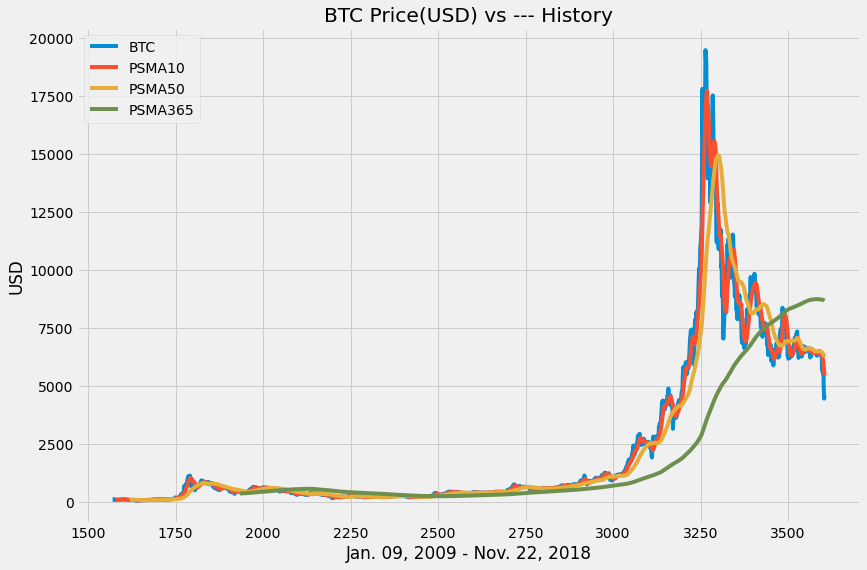

In [23]:
plt.figure(figsize=(12.5, 8.5))
plt.plot(BTC['price(USD)'], label = 'BTC')
plt.plot(PSMA10['price(USD)'], label = 'PSMA10')
plt.plot(PSMA50['price(USD)'], label = 'PSMA50')
plt.plot(PSMA365['price(USD)'], label = 'PSMA365')
#plt.plot(PSMA1000['price(USD)'], label = 'PSMA1000')
plt.title('BTC Price(USD) vs --- History')
plt.xlabel('Jan. 09, 2009 - Nov. 22, 2018')
plt.ylabel('USD')
plt.legend(loc='upper left')
plt.show() 

In [24]:
#Create a new data frame to store all the data
Price_data = pd.DataFrame()
Price_data['BTC'] = BTC['price(USD)']
Price_data['PSMA10'] = PSMA10['price(USD)']
Price_data['PSMA50'] = PSMA50['price(USD)']
Price_data['PSMA365'] = PSMA365['price(USD)']
Price_data['PSMA1000'] = PSMA1000['price(USD)']
Price_data

,BTC,PSMA10,PSMA50,PSMA365,PSMA1000
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3600,5559.74,6089.834,6401.1020,8716.593397,4241.94158
3601,5620.78,6007.652,6381.4234,8710.716000,4247.12410
3602,4863.93,5855.432,6346.3050,8702.016986,4251.56707
3603,4465.54,5660.623,6303.7510,8691.769863,4255.60757


In [25]:
#Create a function to signal when to bu and sell
def buy_sell(Price_data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range(len(Price_data)):
        if Price_data['PSMA10'][i]  > Price_data['PSMA50'][i]:
            if flag != 1:
                sigPriceBuy.append(Price_data['BTC'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif Price_data['PSMA10'][i] < Price_data['PSMA50'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(Price_data['BTC'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
    return (sigPriceBuy, sigPriceSell)

In [26]:
#Store the buy and sell data into a variable
buy_sell = buy_sell(Price_data)
Price_data['Buy_Signal_Price'] = buy_sell[0]
Price_data['Sell_Signal_Price'] = buy_sell[1]

In [27]:
Price_data

,BTC,PSMA10,PSMA50,PSMA365,PSMA1000,Buy_Signal_Price,Sell_Signal_Price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3600,5559.74,6089.834,6401.1020,8716.593397,4241.94158,NaN,NaN
3601,5620.78,6007.652,6381.4234,8710.716000,4247.12410,NaN,NaN
3602,4863.93,5855.432,6346.3050,8702.016986,4251.56707,NaN,NaN
3603,4465.54,5660.623,6303.7510,8691.769863,4255.60757,NaN,NaN


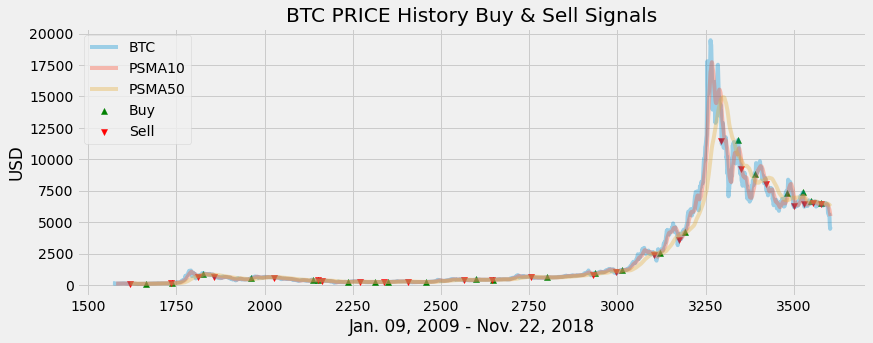

In [28]:
#Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.6, 4.6))
plt.plot(Price_data['BTC'], label = 'BTC', alpha = 0.35)
plt.plot(Price_data['PSMA10'], label = 'PSMA10', alpha = 0.35)
plt.plot(Price_data['PSMA50'], label = 'PSMA50', alpha = 0.35)
#plt.plot(Price_data['PSMA365'], label = 'PSMA365', alpha = 0.35)
plt.scatter(Price_data.index, Price_data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(Price_data.index, Price_data['Sell_Signal_Price'],label = 'Sell', marker = 'v', color = 'red')
plt.title('BTC PRICE History Buy & Sell Signals')
plt.xlabel('Jan. 09, 2009 - Nov. 22, 2018')
plt.ylabel('USD')
plt.legend(loc='upper left')
plt.show() 

In [29]:
type(Price_data)

pandas.core.frame.DataFrame

In [31]:
Price_data.describe()

,BTC,PSMA10,PSMA50,PSMA365,PSMA1000,Buy_Signal_Price,Sell_Signal_Price
count,2035.000000,2026.000000,1986.000000,1671.000000,1036.000000,23.000000,24.000000
mean,2279.330865,2277.824864,2259.144982,1949.177683,1391.753784,2689.432609,2807.854167
std,3442.946652,3432.412808,3370.745069,2723.650268,1288.171271,3480.591958,3487.922659
min,68.500000,79.180000,95.343800,265.226712,364.786100,107.950000,99.800000
25%,320.220000,326.088500,337.034400,386.416452,429.552687,313.840000,369.727500
50%,596.330000,602.710500,598.447400,536.225890,587.480100,622.930000,671.910000
75%,2575.190000,2566.362250,2534.376450,1789.541507,2480.942332,5357.265000,6327.780000
max,19475.800000,17726.920000,14948.004000,8754.539205,4259.794510,11497.400000,11431.100000


In [ ]:
filtrado_Price_data = Price_data.fillna(0)
filtrado_Price_data
